# 最近傍法

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [2]:
class NNC(object):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self._X = X
        self._y = y
    
    def predict(self, X):
        y_pred = np.empty(len(X), dtype=self._y.dtype)
        for i, x in enumerate(X):
            distances = self.distance(x, self._X)
            y_pred[i] = self.find_nearest(distances)
        return y_pred
    
    def distance(self, x1, x2):
        return np.sum((x1 - x2)**2, axis=1)
    
    def find_nearest(self, distances):
        nearest_index = distances.argmin()
        return self._y[nearest_index]

## サンプルデータ

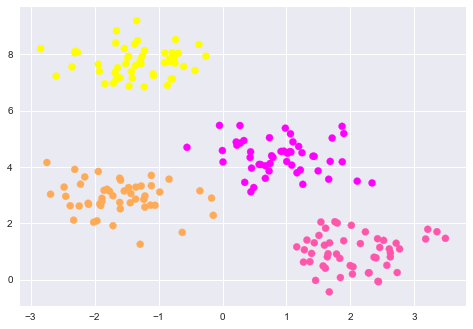

In [3]:
from sklearn.datasets.samples_generator import make_blobs
# データセット生成
X, y = make_blobs(n_samples=200, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

In [4]:
def split_train_test(X, y):
    # 訓練データとテストデータを分ける
    from sklearn.utils import shuffle
    X, y = shuffle(X, y)
    n_train = int(len(y) * 0.8) 
    return X[:n_train], y[:n_train], X[n_train:], y[n_train:]

def score(clf, X_test, y_test):
    # 正解率
    y_predict = clf.predict(X_test)
    return (y_predict == y_test).sum() / float(len(y_test))

In [5]:
X_train, y_train, X_test, y_test = split_train_test(X, y)
# 最近傍法インスタンスを作り、訓練データを学習
clf = NNC()
clf.fit(X_train, y_train)

In [6]:
# 正解率を計算
score(clf, X_test, y_test)

1.0

### 訓練データとテストデータを図示

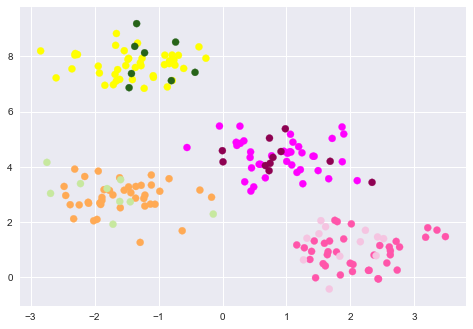

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='spring')
# テストデータ
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='PiYG')

# k近傍法

In [8]:
from scipy import stats

class KNNC(object):
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self._X = X
        self._y = y
    
    def predict(self, X):
        y_pred = np.empty(len(X), dtype=self._y.dtype)
        for i, x in enumerate(X):
            distances = self.distance(x, self._X)
            y_pred[i] = self.find_nearest(distances)
        return y_pred
    
    def distance(self, x1, x2):
        return np.sum((x1 - x2)**2, axis=1)
    
    def find_nearest(self, distances):
        nearest_index = distances.argsort()[:self.k]
        mode, _ = stats.mode(self._y[nearest_index])
        return mode

## サンプルデータ

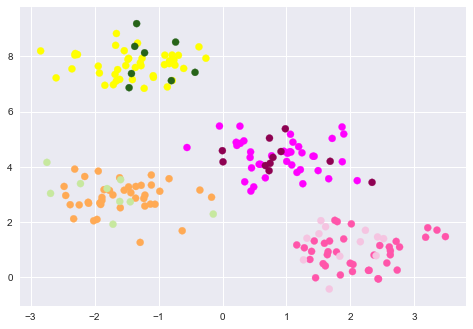

In [9]:
clf = KNNC(3)
clf.fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='spring')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='PiYG')

## 重なりのあるデータ

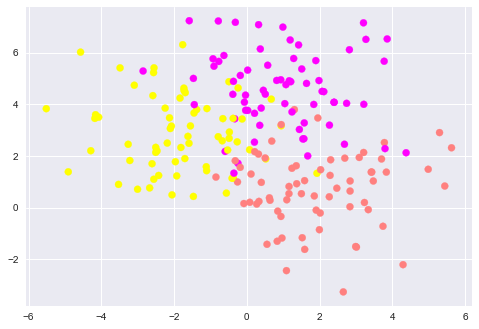

In [10]:
X, y = make_blobs(n_samples=200, centers=3,
                  random_state=0, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

In [11]:
def plot_boundary(clf, X, y):
    # 境界を図示
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap='spring', alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

### 最近傍法の場合

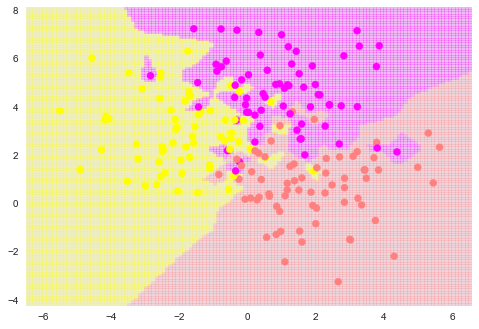

In [12]:
clf = NNC()
clf.fit(X, y)
plot_boundary(clf, X, y)

### k近傍法の場合

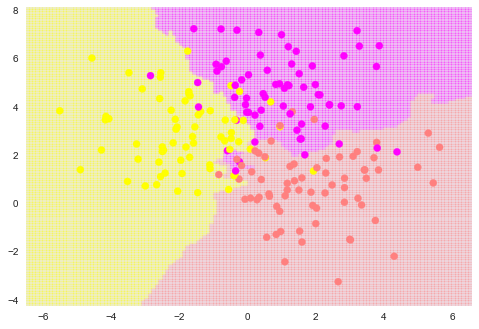

In [13]:
clf = KNNC(5)
clf.fit(X, y)
plot_boundary(clf, X, y)

# k近傍法を用いた回帰

In [14]:
class KNNR(object):
    def __init__(self, k):
        self.k = k
    
    def fit(self, X, y):
        self._X = X
        self._y = y
    
    def predict(self, X):
        y_pred = np.empty(len(X), dtype=self._y.dtype)
        for i, x in enumerate(X):
            distances = self.distance(x, self._X)
            y_pred[i] = self.find_nearest(distances)
        return y_pred
    
    def distance(self, x1, x2):
        return np.sum((x1 - x2)**2, axis=1)
    
    def find_nearest(self, distances):
        nearest_index = distances.argsort()[:self.k]
        return np.mean(self._y[nearest_index])

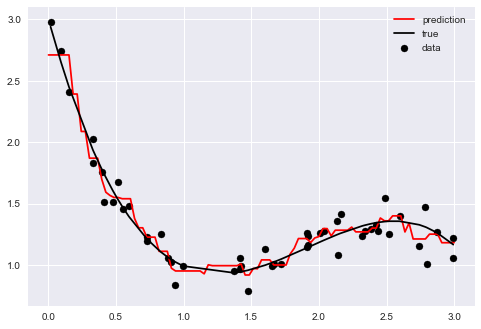

In [15]:
# データセット生成
X = np.sort(3 * np.random.rand(50, 1), axis=0)
T = np.linspace(0, 3, 100)[:, np.newaxis]
Ey = 2 - 4*X + 3*X**2 - 0.55*X**3 + np.cos(X)
y = Ey + 0.1 * np.random.randn(50, 1)

#回帰インスタンスを作り学習
knn = KNNR(3)
knn.fit(X, y)
# 予測
y_ = knn.predict(T)

#結果を図示
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='r', label='prediction')
plt.plot(X, Ey, c='k', label='true')
plt.legend()